<a href="https://colab.research.google.com/github/MariaAkterKhadiza/PHITRON_AI-ML-B1/blob/main/Module_17_(final_Exam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("final-employee-ds.csv")
df

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,196,Employee_96,58,Female,Marketing,9,67350.0,47,65,2021-06-20,S,9,25,2
96,197,Employee_97,56,Male,IT,12,133008.0,45,77,2011-11-03,XL,5,12,2
97,198,Employee_98,43,Female,Management,1,134297.0,45,64,2015-05-24,M,3,39,3
98,199,Employee_99,48,Male,Marketing,1,65351.0,36,84,2021-05-19,L,5,17,2


**Question_01**

In [ ]:
training_hours = df['TrainingHours'].to_numpy(dtype=float)

print(training_hours)
mean_training = np.mean(training_hours)
print(mean_training)

std_training = np.std(training_hours)
print(std_training)



[ 4. 18. 13. 25.  3. 24. 44. 41. 24. 17. 39.  7. 38. 39. 13. 31. 37. 32.
 22. 14. 32. 24. 16. 32. 46.  1. 13. 39. 39. 38.  5.  5.  2.  6.  7. 41.
 14. 46. 28. 32. 29. 38. 26. 35. 28. 37. 32. 36. 26. 32.  3. 21.  1.  9.
  4.  9. 32. 37. 12. 30. 46. 35. 44. 23. 14. 28.  7.  4. 28. 46.  3. 11.
 44.  1. 26. 30. 35. 35. 25. 42. 26.  4. 19. 10.  9. 39. 37.  5.  7. 22.
 46. 25. 45. 42. 11. 25. 12. 39. 17. 24.]
24.19
13.842467265628624


# **Questions_2**

In [ ]:
df['Salary'] = df.groupby("Department")['Salary'].transform(
    lambda x: x.fillna(x.median())
)
salary_sum = df.loc[
    (df["ExperienceYears"] > 12) & (df["ProjectCount"] > 5),
    'Salary'
].sum()
print(salary_sum)



1985775.5


**Question_03**

In [ ]:
filtered_employees = df[((df["Department"] == "IT") | (df["Department"] == "Finance")) &(df["Age"].between(30, 45)) &(df["PerformanceScore"] > 88)
][["Department","Age","PerformanceScore",'Salary']]



filtered_employees = filtered_employees.sort_values(by="Salary", ascending=False)



print(filtered_employees)


   Department  Age  PerformanceScore    Salary
94         IT   45                94  140386.0
88    Finance   30                92  126027.0
4     Finance   40                97   85543.0
32         IT   39                98   83919.0
55    Finance   31                94   49540.0


### **Question_4**

In [ ]:
df['SalaryPerHour'] = df['Salary'] / (df['WorkHoursPerWeek'] * 4)
#print(df)

salary_top5 = df[['Name','SalaryPerHour']].sort_values(by='SalaryPerHour',ascending=False).head(5)

print(salary_top5)

           Name  SalaryPerHour
46  Employee_47     981.278571
27  Employee_28     971.292857
31  Employee_32     967.392857
79  Employee_80     945.335526
80  Employee_81     937.858974


## Question_05

<Axes: title={'center': 'Employee in each department'}, xlabel='Department', ylabel='Number of Employees'>

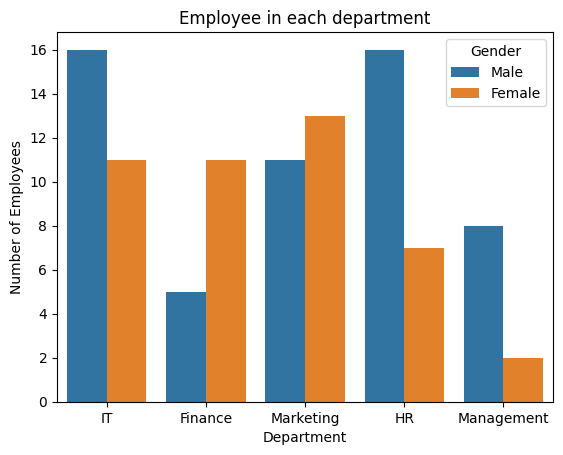

In [ ]:
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Employee in each department")
sns.countplot(data=df,x='Department',hue='Gender')